# Análisis de los tweets

Una vez que se ha escuchado y guardado los tweets con la palabra 'madrid', se tienen que analizar.

A la hora de de guardar los tweets se ha obtado por guardalos en Mongodb ya que 1) los documentos y los tweets son en formato JSON y 2) no se tiene el problema de la codificación unicode. Por tanto, se tiene que tener arrancado Mongodb.

Como se ha buscado por la palabra 'madrid' y se podrían obtener muchos tweets y ser baneado, se ha obtado por escuchar 2 minutos por hora en un día. Por ejemplo, un día se arranca el listener a las 9:30 hasta las 9:32 y ya no se vuelve ha escuchar más en esa hora, teniendo la colección sólo esos tweets a las 9 horas.

### Importando líbrerias y variables

Se importa la librería matplot para crear gráficos y el archivo util que se adjunta que contiene las clases con la funcionalidad para el análisis.

Para manejar la conexión con la base de datos se utilizará la clase util.ManejadorMongodb y para convertir los tweets almacenados en pandas se utilizará util.MongodbParseadorTweetsAPandas. En esta última clase hay un método llamado pasearTodosTweetsFiltradoEnPandas() que leerá los tweets en la colección y los parsea a pandas:

- pasearTodosTweetsFiltradoEnPandas(): añade el nombre de usuario, la fecha de creación del tweet, el texto, la localización dada por el atributo "place" del tweet y el lenguaje del tweet (dado que 'madrid' es una palabra que puede ser referenciada en varios lenguajes). Además cuenta el número de caracteres (un emoticono se considera que es un carácter) y número de palabras (un emoticono, mención, hashtag o url se considerará como una palabra).
- anyadirHoraMinuto(): añade la hora y minuto del tweet. Se ha decidido incorporar los minutos para poder saber cuantos tweets por segundos fueron posteados.
- anyadirEmoticonosHashtagsMenciones(): añade los emoticonos, hashtags y menciones que contiene el texto en distintas columnas.

In [4]:
# coding=utf-8
import util
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
mongodbHost = "localhost"  # host de mongodb
mongodbPuerto = 27017  # puerto donde esta escuchando mongodb
mongodbUsuario = None  # usuario de mongodb para poder conectarse o None si no se necesita
mongodbPassword = None  # password del usuario de mongodb para poder conectarse o None si no se necesita
nombreBasedatos = "tweetsfinal"  # nombre de la base de datos
nombreColeccionTweets = "tweetfiltrado"  # nombre de la colección para guardar tweets que serán analizados

In [12]:
analisisUtilidad = util.AnalisisUtilidad()  # clase que se utilizará para el análisis
manejadorMongodb = util.ManejadorMongodb(mongodbHost=mongodbHost, mongodbPuerto=mongodbPuerto, 
                                         usuario=mongodbUsuario, password=mongodbPassword,
                                         basedatosNombreTweets=nombreBasedatos, 
                                         coleccionNombreTweetsFiltrado=nombreColeccionTweets)
mongodbParseadorEscritorTweetsAPandas = util.MongodbParseadorTweetsAPandas(manejadorMongodb)
# Se parsea los tweets de JSON a pandas
mongodbParseadorEscritorTweetsAPandas.pasearTodosTweetsFiltradoEnPandas()
# Se añade la hora y el minuto
mongodbParseadorEscritorTweetsAPandas.anyadirHoraMinuto()
# Se añade como listas los emoticonos, hashtags y menciones de cada tweet
mongodbParseadorEscritorTweetsAPandas.anyadirEmoticonosHashtagsMenciones()
pdTweets = mongodbParseadorEscritorTweetsAPandas.pdTweetsFiltrado
print u"Número total de tweets " + str(len(pdTweets))
pdTweets

Número total de tweets 2093


,fecha_creacion,lenguaje,localizacion,numero_caracteres,numero_palabras,texto,usuario,hora,minuto,emoticonos,hashtags,menciones
943025916111757312,Tue Dec 19 07:51:13 +0000 2017,es,None,209.0,28.0,Otro 155 encubierto para dividir a la oposició...,David Sánchez,7,51,[],[#LaCafeteraEuropaEnsMira],[]
943025949200846848,Tue Dec 19 07:51:21 +0000 2017,en,None,34.0,2.0,the swines https://t.co/enN0WTylYb,mlamuli,7,51,[],[],[]
943025960311578625,Tue Dec 19 07:51:24 +0000 2017,es,None,268.0,38.0,Como os entiendo. Espero que este desproposito...,xavi carreras,7,51,[],[],[]
943025966582063104,Tue Dec 19 07:51:25 +0000 2017,es,None,67.0,5.0,Antimadrista Universal y retrasado espacial ht...,Jose,7,51,[],[],[]
943025972693094400,Tue Dec 19 07:51:27 +0000 2017,es,None,128.0,21.0,@rubenuria @RubyOrtega9 Como que ganar en el B...,Fran el VanBa,7,51,[],[],"[@rubenuria, @RubyOrtega9]"
943025976165982209,Tue Dec 19 07:51:27 +0000 2017,fr,None,160.0,19.0,Je sais pas pourquoi les dirigeants sportifs p...,Липи Ндиайе,7,51,[],[],[]
943025977919229952,Tue Dec 19 07:51:28 +0000 2017,in,None,136.0,13.0,19 soloposdotcom LIGA SPANYOL : EL Clasico: Ta...,Mags Berita 05,7,51,[],[],[]
943025982771929088,Tue Dec 19 07:51:29 +0000 2017,es,None,301.0,45.0,5 goles de Paulinho en la presente Liga de Esp...,Brock,7,51,"[🇧, 🇷]",[],[]
943026004435570688,Tue Dec 19 07:51:34 +0000 2017,und,None,79.0,11.0,Aquets deuen ser la gent que PP i Cs considere...,Ferran Balaguer,7,51,[],[],[]
943026028439572480,Tue Dec 19 07:51:40 +0000 2017,es,None,130.0,24.0,@MasDeUno no será entre las provincias de Madr...,Estrella,7,51,[],[],[@MasDeUno]


In [13]:
if len(pdTweets)>0:
    print u"Número de palabras por tweet " + str(
        pdTweets[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_NUMEROPALABRAS].sum() / float(len(pdTweets)))
    print u"Número de caracteres por tweet " + str(
        pdTweets[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_NUMEROCARACTERES].sum() / float(len(pdTweets)))

Número de palabras por tweet 16.9202102246
Número de caracteres por tweet 132.014811276


Como se puede ver el número de palabras (incluyendo emoticonos, hashtags, menciones y urls) es muy pequeño (casi 17 por tweet). Si se habla en términos de caracteres, son 132 muy lejos del límite actual de 280 aunque bastante cercano al anterior límite de 140.

### Agrupación por horas

Se agrupa por horas y se muestran las horas en las que no hay ningún tweet, es decir, no se ha escuchado:

In [14]:
agrupadoPorHora = pdTweets.groupby([util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_HORA])
[hora for hora in range(0, 24) if hora not in pdTweets[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_HORA].get_values()]

[0, 1, 2, 3, 4, 5, 6]

A continuación se muestra el número de tweets por cada hora:

hora
7      61
8      88
9     121
10    148
11    162
12    127
13    153
14    172
15    143
16    108
17    126
18    108
19    112
20    127
21    134
22    102
23    101
dtype: int64


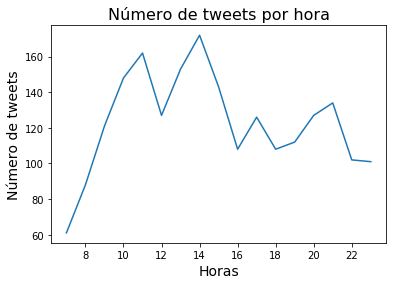

In [15]:
print agrupadoPorHora.size()

plt.title(u"Número de tweets por hora", fontsize=16)
plt.ylabel(u"Número de tweets", fontsize=14)
plt.xlabel("Horas", fontsize=14)
plt.plot(agrupadoPorHora.size())

Como se puede observar a primera hora de la mañana el número de tweets es pequeño (la gente está durmiendo o de camino al trabajo), se encuentra un pico a las 10 (hora del cafe?), luego disminuye y aumenta de nuevo llegando al mayor número de tweets a las 14, a la hora de la comida. Luego disminuye hasta y aumenta justo después de la cena (21). Destacar que la hora es +00 UTC, esto es 1 hora menos que en España, por lo que donde se ha dicho 10, 14 y 21 en realidad son 11, 15 y 22 hora española.

Puesto que se han obtenido los tweets en 2 minutos por hora, se puede calcular cada cuanto tiempo (segundos) un tweet es creado:

In [16]:
((agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_MINUTO].max() - agrupadoPorHora[
        util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_MINUTO].min())*60) / agrupadoPorHora.size()

hora
7     1.967213
8     1.363636
9     0.991736
10    0.810811
11    0.740741
12    0.944882
13    0.784314
14    0.697674
15    0.839161
16    1.111111
17    0.952381
18    1.111111
19    1.071429
20    0.944882
21    0.895522
22    1.176471
23    1.188119
dtype: float64

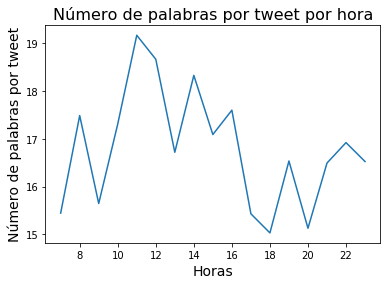

In [17]:
if len(pdTweets)>0:
    plt.title(u"Número de palabras por tweet por hora", fontsize=16)
    plt.ylabel(u"Número de palabras por tweet", fontsize=14)
    plt.xlabel("Horas", fontsize=14)
    plt.plot(agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_NUMEROPALABRAS].sum() / agrupadoPorHora.size())

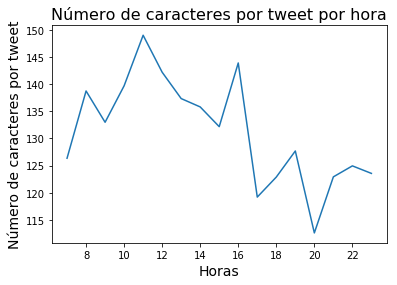

In [18]:
if len(pdTweets)>0:
    plt.title(u"Número de caracteres por tweet por hora", fontsize=16)
    plt.ylabel(u"Número de caracteres por tweet", fontsize=14)
    plt.xlabel("Horas", fontsize=14)
    plt.plot(agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_NUMEROCARACTERES].sum() / agrupadoPorHora.size())

En ambos casos donde más se escribe es a las 11 aunque se observa que no hay ninguna tendencia clara como en el caso tweets por hora.

### Lenguaje de los tweets

A continuación se mostrará algunas estadísticas sobre los lenguajes de los tweets utilizando la clase util.AnalisisUtilidad.

Se obtiene el top 10 de lenguajes de los tweets:

<Container object of 10 artists>

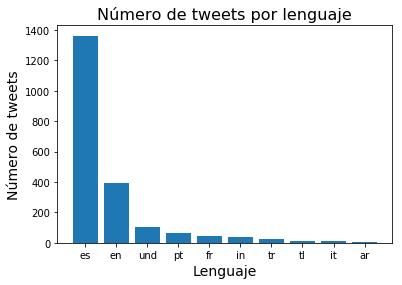

In [19]:
# Se obtiene una lista con el lenguaje y el número de tweets. Se optiene el top 10
listaLenguajesMasFrecuentesNumero = analisisUtilidad.obtenerContadorDeElementosNoListaEnSeriePandas(
            pdTweets[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_LENGUAJE], top=10)
# Se separan en dos listas para ser representadas en un gráfico de barras
listaLenguajesMasFrecuentes, numero = zip(*listaLenguajesMasFrecuentesNumero)
# Se crea el gráfico
plt.title(u"Número de tweets por lenguaje", fontsize=16)
plt.ylabel(u"Número de tweets", fontsize=14)
plt.xlabel("Lenguaje", fontsize=14)
plt.bar(range(len(listaLenguajesMasFrecuentes)), numero, tick_label=listaLenguajesMasFrecuentes, align='center')

Como se podría imaginar, el lenguaje más común con la palabra 'madrid' en estos tweets es el español seguido a una gran distancia del inglés, indeterminado y potugués.

### Emoticonos en los tweets

El siguiente analisis tiene que ver con los emoticonos. Se obtiene el top 3 de los emoticonos por hora, aunque lo más interesante es no agruparlo y mirar cuales son los top 10:

In [20]:
# Se obtienen los top 3 por hora
print agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_EMOTICONOS].apply(lambda fila:
                            analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(fila, top=3))
# Se obtiene los top 10
listaEmoticonosMasFrecuentesNumero = analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(pdTweets[
                util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_EMOTICONOS], top=10)
# Se itera sobre los top 10 y se muestran ya que si se muestran directamente se verán en caracteres unicode
for emoticonosMasFrecuentesNumero in listaEmoticonosMasFrecuentesNumero:
    print emoticonosMasFrecuentesNumero[0] + " " + str(emoticonosMasFrecuentesNumero[1])

hora
7      [(👏, 3), (🇧, 1), (😘, 1)]
8      [(🍳, 1), (☎️, 1), (🏼, 1)]
9      [(🎗, 7), (😂, 6), (🔴, 2)]
10       [(★, 4), (✓, 3), (😍, 3)]
11     [(☎️, 4), (👏, 4), (🏻, 4)]
12     [(😂, 5), (🙄, 3), (🇪, 3)]
13    [(🎄, 12), (🔥, 7), (🎅, 6)]
14    [(😂, 11), (💕, 5), (💯, 5)]
15     [(😭, 6), (😂, 6), (😍, 5)]
16     [(🏼, 4), (🎮, 3), (❤️, 3)]
17     [(🔴, 5), (🔵, 4), (🔝, 4)]
18     [(🇷, 7), (😂, 7), (🇹, 4)]
19     [(😂, 8), (😍, 4), (👇, 3)]
20    [(😂, 22), (😭, 3), (👑, 2)]
21    [(👏, 10), (👇, 8), (🇪, 5)]
22     [(💔, 3), (😂, 3), (⚪️, 2)]
23      [(😂, 4), (⬇️, 4), (❤, 2)]
Name: emoticonos, dtype: object
😂 85
👏 22
😍 22
😭 19
🇪 16
🎄 16
🏻 15
🔥 15
👇 14
👉 13


Como se puede observar el emoticono más utilizado es el de la cara riéndose.  Seguida de los aplausos y cara de amor, lo que puede significar que muchos de los tweets tienen que ser graciosos y positivos. Dentro del top 10 está el árbol de navidad debido a la cercanía de las Navidades.

Por último se muestra el número medio de emoticonos que contiene cada tweet:

In [21]:
analisisUtilidad.obtenerNumeroDeElementosListaEnSeriePandas(pdTweets[
                        util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_EMOTICONOS], promedio=True)

0.35785953177257523

Es interesante este dato ya que los emojis tienen una gran popularidad pero solo hay 0.35 emoticonos por tweet.

### Hashtags en los tweets

Para saber sobre que se está hablando sin tener que analizar el texto completo, se puede utilizar los hashtags. Para ello se mostrarán los top 3 por hora y un gráfico de los top 10 en general:

hora
7              [(#fashion, 2), (#20m, 2), (#madrid, 2)]
8          [(#Madrid, 9), (#20m, 3), (#ErasmusPlus, 2)]
9         [(#empleo, 14), (#Madrid, 14), (#trabajo, 8)]
10             [(#Madrid, 19), (#empleo, 8), (#20m, 7)]
11            [(#Madrid, 15), (#20m, 10), (#Atleti, 6)]
12              [(#Madrid, 8), (#20m, 7), (#empleo, 3)]
13              [(#Madrid, 8), (#20m, 6), (#madrid, 5)]
14         [(#Madrid, 5), (#Republicos, 4), (#mcrc, 4)]
15             [(#20m, 3), (#Madrid, 3), (#Fortuny, 2)]
16     [(#Madrid, 5), (#ElClasico, 3), (#PokemonGo, 3)]
17             [(#Madrid, 9), (#MUFC, 4), (#futbol, 3)]
18            [(#Madrid, 10), (#futbol, 2), (#ECHR, 1)]
19            [(#Madrid, 4), (#madrid, 3), (#Spain, 2)]
20           [(#Madrid, 5), (#LaLiga, 4), (#madrid, 3)]
21             [(#Madrid, 6), (#Spain, 3), (#japan, 2)]
22    [(#Madrid, 4), (#TimoteoZambranoEsPSUV, 3), (#...
23              [(#futbol, 5), (#LaLiga, 2), (#20m, 2)]
Name: hashtags, dtype: object


[(u'#Madrid', 127),
 (u'#20m', 41),
 (u'#empleo', 38),
 (u'#madrid', 32),
 (u'#IT', 18),
 (u'#futbol', 14),
 (u'#PokemonGo', 13),
 (u'#RealMadrid', 12),
 (u'#LaLiga', 11),
 (u'#trabajo', 11)]

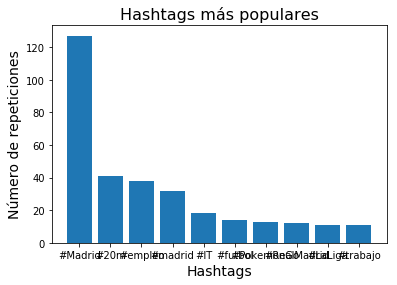

In [22]:
# Se obtienen los top 3 por hora
print agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_HASHTAGS].apply(lambda fila:
                            analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(fila, top=3))
# Se obtiene los top 10
listaHashtagsMasFrecuentesNumero = analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(pdTweets[
                util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_HASHTAGS], top=10)
# Se separan en dos listas para ser representadas en un gráfico de barras
listaHashtagsMasFrecuentes, numero = zip(*listaHashtagsMasFrecuentesNumero)
# Se crea el gráfico
plt.title(u"Hashtags más populares", fontsize=16)
plt.ylabel(u"Número de repeticiones", fontsize=14)
plt.xlabel("Hashtags", fontsize=14)
plt.bar(range(len(listaHashtagsMasFrecuentes)), numero, tick_label=listaHashtagsMasFrecuentes, align='center')

listaHashtagsMasFrecuentesNumero

Como se está acercando El Clásico, hay hashtags relativos al fútbol, especialemente por la tarde y la noche. Por supuesto #Madrid es el que más se repite siendo el segundo un hashtag relativo a noticias (pudiendo tratarse de las elecciones en Cataluña).

### Menciones en los tweets

Por último se mostrarán las menciones para ver quien está siendo más popular en cada momento. De nuevo se mostrará el top 3 por hora y un gráfico de los top 10 en todas las horas:

hora
7     [(@magneto_pink, 2), (@ESPN_FDJ, 2), (@MasDeUn...
8     [(@MADRID, 3), (@carlossmato, 3), (@ManuelaCar...
9     [(@elcarrildel2, 2), (@memedeportes, 2), (@Ben...
10    [(@El_Intermedio, 2), (@libertaddigital, 2), (...
11    [(@el_pais, 3), (@marianorajoy, 2), (@ccifuent...
12    [(@brunoformiga, 2), (@_danielmartin_, 2), (@d...
13    [(@realmadrid, 2), (@kreator, 2), (@GuajeSalva...
14    [(@agarzon, 3), (@ahorapodemos, 3), (@carlossm...
15    [(@MADRID, 4), (@guardian_sport, 2), (@FJuntos...
16    [(@rfegolf, 2), (@PlateaMagazine, 1), (@Iron_A...
17     [(@RCDEspanyol, 2), (@Benzema, 2), (@MADRID, 2)]
18       [(@KRLS, 2), (@FCBarcelona, 2), (@YouTube, 2)]
19    [(@REALBRASlL, 2), (@YouTube, 2), (@As_TomasRo...
20    [(@YouTube, 2), (@villaratorules, 1), (@Jaimef...
21    [(@RMBaloncesto, 5), (@valenciabasket, 4), (@E...
22    [(@elbernabeucom, 3), (@YouTube, 2), (@FeriaAr...
23    [(@MADRID, 3), (@thebbbuzz, 2), (@rafaleonorte...
Name: menciones, dtype: object


[(u'@MADRID', 26),
 (u'@YouTube', 14),
 (u'@carlossmato', 13),
 (u'@ManuelaCarmena', 11),
 (u'@realmadrid', 11),
 (u'@As_TomasRoncero', 8),
 (u'@elchiringuitotv', 8),
 (u'@Benzema', 8),
 (u'@dovebulletin', 7),
 (u'@agarzon', 7)]

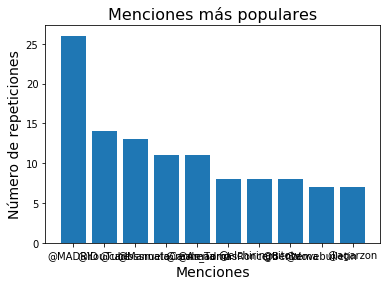

In [23]:
# Se obtienen los top 3 por hora
print agrupadoPorHora[util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_MENCIONES].apply(lambda fila:
                            analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(fila, top=3))
# Se obtiene los top 10
listaMencionesMasFrecuentesNumero = analisisUtilidad.obtenerContadorDeElementosListaEnSeriePandas(pdTweets[
                util.ParseadorTweetsAPandas.NOMBRE_COLUMNA_MENCIONES], top=10)
# Se separan en dos listas para ser representadas en un gráfico de barras
listaMencionesMasFrecuentes, numero = zip(*listaMencionesMasFrecuentesNumero)
# Se crea el gráfico
plt.title(u"Menciones más populares", fontsize=16)
plt.ylabel(u"Número de repeticiones", fontsize=14)
plt.xlabel("Menciones", fontsize=14)
plt.bar(range(len(listaMencionesMasFrecuentes)), numero, tick_label=listaMencionesMasFrecuentes, align='center')

listaMencionesMasFrecuentesNumero

Si se mira por horas no se obtiene ninguna conclusión pero si se mira sin agrupar se ve claramente que los más mencionados/populares son el Ayuntamiento de Madrid y políticos o relativos a éstos. También, como en los hashtags, se mencionan cuentas sobre futbol.